In [1]:
cd ../backprop

/Users/darioml/src/fyp/backprop


In [2]:
%pylab inline
from scipy_optim import NN_1HL
import time
import numpy as np
from scipy_optim import NN_1HL
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.io

Populating the interactive namespace from numpy and matplotlib


In [18]:
data_file = scipy.io.loadmat('../data/ball.mat')

data = np.array(data_file['X'])
labels = np.array(data_file['Y'], 'uint8').T

labels = labels.flatten()

In [4]:
def test_simple_backprop(data, labels, hidden_nodes, iterations, maxiter=200, plot=False):
    times = []
    accuracy = []
    
    for i in range(iterations):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, labels, test_size=0.2)
        nn = NN_1HL(maxiter=maxiter, hidden_layer_size=hidden_nodes)
        
        time_now = time.time()
        nn.fit(X_train, y_train)
        times.append( time.time() - time_now )
        
        accuracy.append(accuracy_score(y_test, nn.predict(X_test)))
    return np.mean(accuracy),np.mean(times),accuracy,times

done with 1
done with 2
done with 3


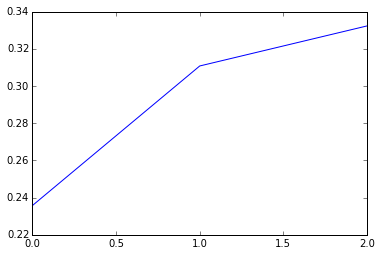

In [9]:
maxiter_sizes = [10, 20, 50, 200, 500, 800, 1000, 1500, 2000]

results = np.zeros(len(maxiter_sizes))
times = np.zeros(len(maxiter_sizes))

for i in range(len(maxiter_sizes)):
    results[i],times[i],_,_ = test_simple_backprop(data, labels, 20, 5, maxiter_sizes[i])
    print 'done with %i' % maxiter_sizes[i]
    
plot(results)


In [11]:
scipy.io.savemat('../results/backprop_maxiter.mat', {'acc': results, 'times': times})

### We now look at different data inputs

Start with negative input

In [49]:




hidden_size = [15,17,19,21,23,25,27,29,31,33,35]

data2 = np.concatenate(( data[0:-1,:], data[1:,:] ),1 ) 

results = np.zeros((2,len(hidden_size)))

for i in range(len(hidden_size)):
    results[0,i],_,_,_ = test_simple_backprop(data , labels, hidden_size[i], 20, 500)
    results[1,i],_,_,_ = test_simple_backprop(data2, labels, hidden_size[i], 20, 500)
    print 'done with %i' % hidden_size[i]
    
plot(results.T)

(1623, 512)
(1624, 256)


1
